In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#data collection and processing
gold_data= pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#gettuing statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#coorelation - positive and negative
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation analysis
numerical_features = gold_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numerical_features.corr()
correlation = gold_data.corr()

<Axes: >

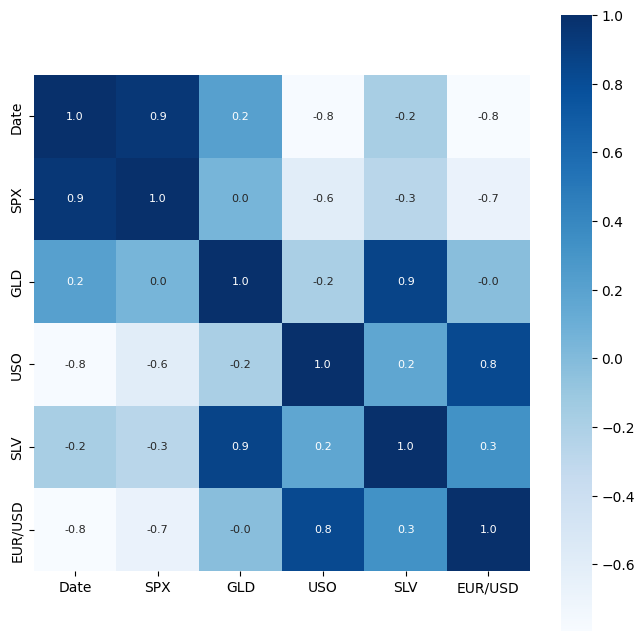

In [ ]:
#constructing a heat map
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [ ]:
#correlation value
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-17-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

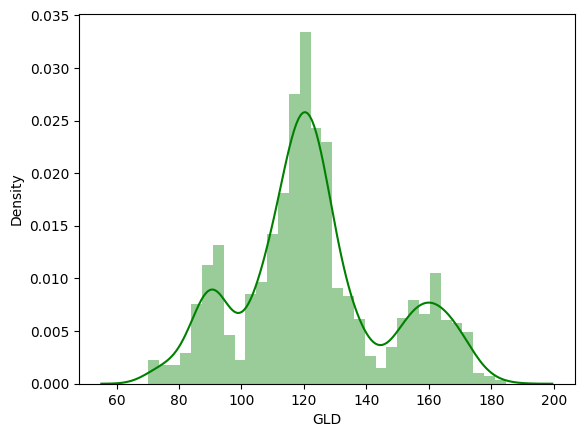

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
#splitinng the features and target
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
#slpiting into training and testing data
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state =2)

In [ ]:
#model training
#random forest algorithm
regressor= RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
#model evaluation
test_data_prediction= regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.28749912  81.90439984 116.2489998  127.58450083 120.5134014
 154.90539745 150.31999814 126.04650025 117.35949884 126.03140085
 116.84280094 171.47680066 141.5149984  167.849398   115.23789966
 117.62800047 137.10240326 169.93810095 159.20140357 160.71310005
 155.07129999 125.4557005  176.08839947 157.22610245 125.16820038
  93.72229944  77.1753004  120.53770001 119.16349966 167.30999999
  88.22690049 125.33650036  91.01220089 117.61160027 121.0973987
 135.97270009 115.34890128 115.33750073 146.98469982 107.02050095
 104.77710255  87.12059778 126.51620037 118.07130004 152.81409901
 119.57900035 108.39909972 107.92139828  93.15460066 126.97869803
  75.3134002  113.58199912 121.46929998 111.192599   119.01729911
 120.21419956 159.68259956 167.52670103 146.97159632  85.98489862
  94.28350035  86.90279913  90.5718     119.03610056 126.4893008
 127.64320016 168.59799967 122.14419965 117.35199916  98.50590022
 167.82819956 143.41239888 131.37830209 121.25690208 121.26569933
 119.75040055

In [ ]:
#r squared error
error_score= metrics.r2_score(y_test, test_data_prediction)
print("r squared error : ", error_score)

r squared error :  0.990278174529141


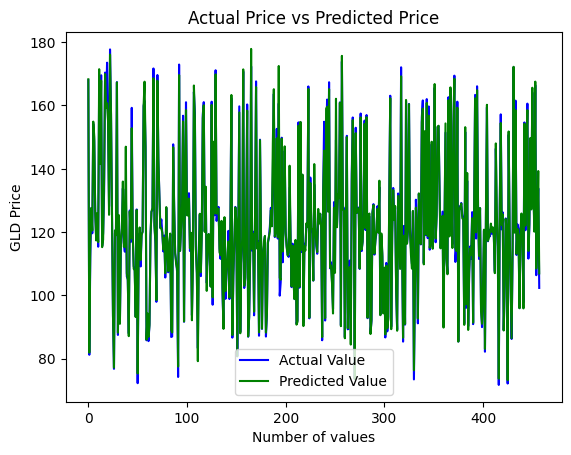

In [ ]:
#plotting the model result
y_test = list(y_test)
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()